<a href="https://colab.research.google.com/github/sidagarwal-labs/DSBA-6211---Advance-Business-Analytics/blob/main/Survival_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read the data
df = pd.read_csv('heart_attack.csv')

In [ ]:
#visually inspect the data in table form
df

,id,age,gender,hr,sysbp,diasbp,bmi,cvd,afb,sho,...,miord,mitype,year,admitdate,disdate,fdate,los,dstat,lenfol,fstat
0,1,83,0,89,152,78,25.54051,1,1,0,...,1,0,1,1/13/1997,1/18/1997,12/31/2002,5,0,2178,0
1,2,49,0,84,120,60,24.02398,1,0,0,...,0,1,1,1/19/1997,1/24/1997,12/31/2002,5,0,2172,0
2,3,70,1,83,147,88,22.14290,0,0,0,...,0,1,1,1/1/1997,1/6/1997,12/31/2002,5,0,2190,0
3,4,70,0,65,123,76,26.63187,1,0,0,...,0,1,1,2/17/1997,2/27/1997,12/11/1997,10,0,297,1
4,5,70,0,63,135,85,24.41255,1,0,0,...,0,1,1,3/1/1997,3/7/1997,12/31/2002,6,0,2131,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,76,1,68,112,88,27.96454,1,1,0,...,0,1,3,7/9/2001,7/10/2001,7/19/2001,1,0,10,1
496,497,76,1,88,208,96,24.26862,1,0,0,...,0,0,3,3/9/2001,3/12/2001,12/31/2002,3,0,662,0
497,498,57,1,123,120,74,42.13576,1,1,0,...,0,0,3,1/5/2001,1/8/2001,12/31/2002,3,0,725,0
498,499,67,0,59,112,62,27.40905,1,0,0,...,0,1,3,7/17/2001,7/18/2001,12/31/2002,1,0,532,0


In [ ]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         500 non-null    int64  
 1   age        500 non-null    int64  
 2   gender     500 non-null    int64  
 3   hr         500 non-null    int64  
 4   sysbp      500 non-null    int64  
 5   diasbp     500 non-null    int64  
 6   bmi        500 non-null    float64
 7   cvd        500 non-null    int64  
 8   afb        500 non-null    int64  
 9   sho        500 non-null    int64  
 10  chf        500 non-null    int64  
 11  av3        500 non-null    int64  
 12  miord      500 non-null    int64  
 13  mitype     500 non-null    int64  
 14  year       500 non-null    int64  
 15  admitdate  500 non-null    object 
 16  disdate    500 non-null    object 
 17  fdate      500 non-null    object 
 18  los        500 non-null    int64  
 19  dstat      500 non-null    int64  
 20  lenfol    

In [ ]:
#Transform the variable 'fstat' from an integer in a boolean
df['fstat']=df['fstat']==1

In [ ]:
! pip install -q lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 7.7 MB/s eta 0:00:00


<Axes: xlabel='timeline'>

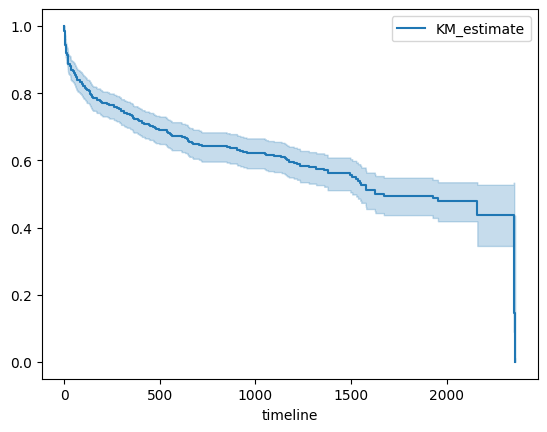

In [ ]:
# KM plot for the entire dataset
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(durations = df['lenfol'], event_observed = df['fstat'])
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival of different gender group')

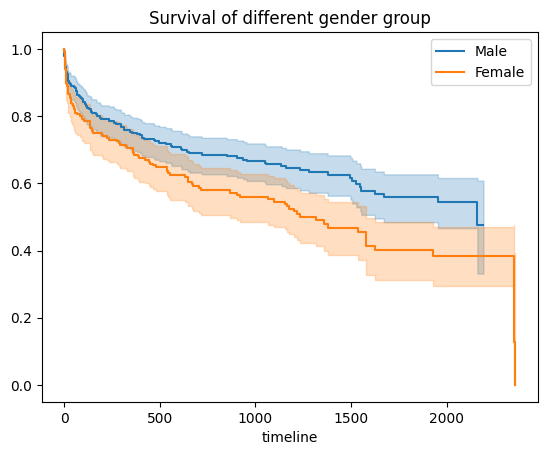

In [ ]:
# KM plot for gender categories
ax = plt.subplot(111)
m = (df["gender"] == 0)
kmf.fit(durations = df['lenfol'][m], event_observed = df['fstat'][m], label = "Male")
kmf.plot_survival_function()
kmf.fit(durations = df['lenfol'][~m], event_observed = df['fstat'][~m], label = "Female")
kmf.plot_survival_function()
plt.title("Survival of different gender group")

Text(0.5, 1.0, 'Survival of different CVD group')

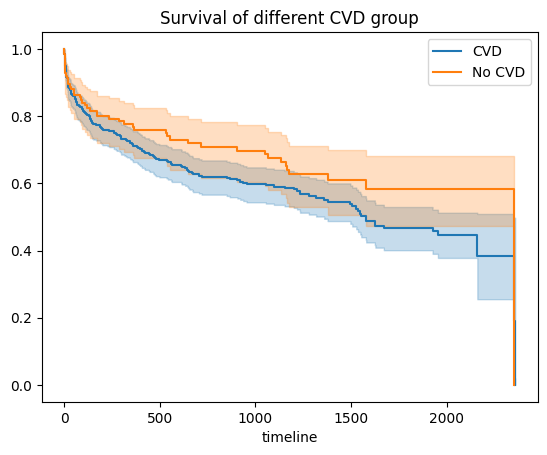

In [ ]:
# KM plot for cvd categories
ax = plt.subplot(111)
m = (df["cvd"] == 1)
kmf.fit(durations = df['lenfol'][m], event_observed = df['fstat'][m], label = "CVD")
kmf.plot_survival_function()
kmf.fit(durations = df['lenfol'][~m], event_observed = df['fstat'][~m], label = "No CVD")
kmf.plot_survival_function()
plt.title("Survival of different CVD group")

In [ ]:
# Select variables for the Cox proportional hazard model
df_cox = df[['lenfol','fstat','age', 'gender', 'hr',
'sysbp', 'diasbp', 'bmi', 'cvd', 'afb', 'sho', 'chf', 'av3',
'miord', 'mitype', 'los']]

In [ ]:
df_cox

,lenfol,fstat,age,gender,hr,sysbp,diasbp,bmi,cvd,afb,sho,chf,av3,miord,mitype,los
0,2178,False,83,0,89,152,78,25.54051,1,1,0,0,0,1,0,5
1,2172,False,49,0,84,120,60,24.02398,1,0,0,0,0,0,1,5
2,2190,False,70,1,83,147,88,22.14290,0,0,0,0,0,0,1,5
3,297,True,70,0,65,123,76,26.63187,1,0,0,1,0,0,1,10
4,2131,False,70,0,63,135,85,24.41255,1,0,0,0,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10,True,76,1,68,112,88,27.96454,1,1,0,0,0,0,1,1
496,662,False,76,1,88,208,96,24.26862,1,0,0,0,0,0,0,3
497,725,False,57,1,123,120,74,42.13576,1,1,0,0,0,0,0,3
498,532,False,67,0,59,112,62,27.40905,1,0,0,0,0,0,1,1


In [ ]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(df_cox, duration_col = 'lenfol', event_col = 'fstat')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 500 total observations, 285 right-censored observations>
             duration col = 'lenfol'
                event col = 'fstat'
      baseline estimation = breslow
   number of observations = 500
number of events observed = 215
   partial log-likelihood = -1114.58
         time fit was run = 2025-11-18 00:11:39 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.05      1.05      0.01            0.03            0.06                1.03                1.06
gender    -0.29      0.75      0.14           -0.58           -0.01                0.56                0.99
hr         0.01      1.01      0.00            0.01            0.02                1.01                1.02
sysbp      0.00      1.00      0.00           -0.00            0.01                1.00                1.01
diasbp    -0.01      0.99      0.00           -0.02           -0.00                0.98                1.00
bmi       -0.05      0.95      0.02           -0.08           -0.01                0.92                0.99
cvd       -0.06      0.95      0.18           -0.41            0.30                0.67                1.34
afb        0.04      1.04      0.18           -0.32            0.39                0.73                1.48
sho        1.24      3.45      0.29            0.67            1.81                1.96                6.09
chf        0.73      2.08      0.15            0.43            1.03                1.54                2.81
av3        0.31      1.37      0.43           -0.53            1.16                0.59                3.18
miord      0.08      1.09      0.15           -0.21            0.38                0.81                1.46
mitype    -0.24      0.79      0.19           -0.62            0.14                0.54                1.15
los       -0.01      0.99      0.02           -0.04            0.02                0.96                1.02

           cmp to     z      p  -log2(p)
covariate                               
age          0.00  6.84 <0.005     36.90
gender       0.00 -2.03   0.04      4.55
hr           0.00  3.89 <0.005     13.30
sysbp        0.00  0.52   0.60      0.73
diasbp       0.00 -2.55   0.01      6.54
bmi          0.00 -2.84 <0.005      7.80
cvd          0.00 -0.31   0.76      0.40
afb          0.00  0.20   0.84      0.25
sho          0.00  4.28 <0.005     15.74
chf          0.00  4.81 <0.005     19.33
av3          0.00  0.73   0.47      1.10
miord        0.00  0.56   0.58      0.80
mitype       0.00 -1.23   0.22      2.20
los          0.00 -0.46   0.65      0.63
---
Concordance = 0.78
Partial AIC = 2257.16
log-likelihood ratio test = 225.48 on 14 df
-log2(p) of ll-ratio test = 131.16

<Axes: xlabel='log(HR) (95% CI)'>

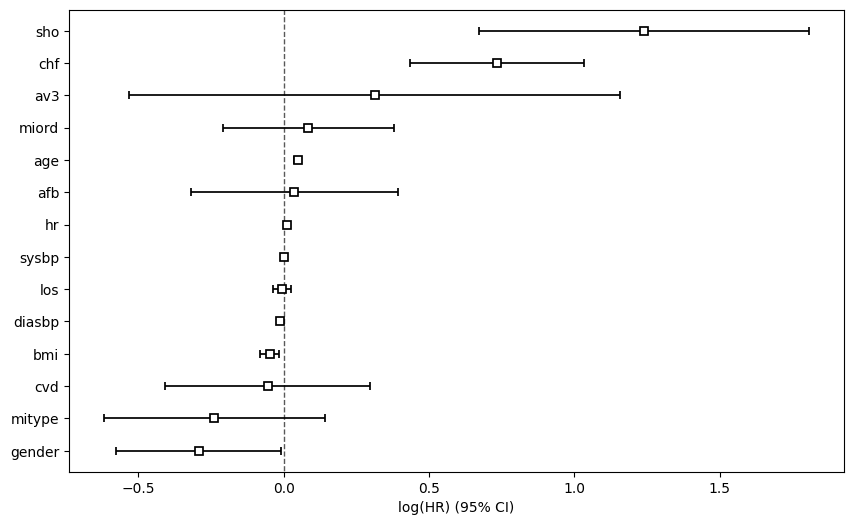

In [ ]:
# Plot coefficients
plt.subplots(figsize = (10, 6))
cph.plot()

In [ ]:
# Optional: a Cox-PH model with only one independent variable, gender.
df_cox1 = df[['lenfol','fstat','gender']]
cph.fit(df_cox1, duration_col = 'lenfol', event_col = 'fstat')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 500 total observations, 285 right-censored observations>
             duration col = 'lenfol'
                event col = 'fstat'
      baseline estimation = breslow
   number of observations = 500
number of events observed = 215
   partial log-likelihood = -1223.52
         time fit was run = 2025-11-18 00:12:08 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
gender     0.38      1.46      0.14            0.11            0.65                1.12                1.92

           cmp to    z    p  -log2(p)
covariate                            
gender       0.00 2.77 0.01      7.49
---
Concordance = 0.54
Partial AIC = 2449.04
log-likelihood ratio test = 7.60 on 1 df
-log2(p) of ll-ratio test = 7.42